# Evaluation Project -6:Loan Application Status Prediction

# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Imorting all the necessary libraries:


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the Data Set:

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Independent Variables:

- Loan_ID:   
The ID of an applicant

- Gender-       
applicant gender

- Married-      
marrital status of applicant

- Dependents-     
any dependencies present

- Education-      
education qualification of applicant

- Self_Employed-   
employment status of applicant

- ApplicantIncome-   
earned income of applicant

- CoapplicantIncome-   
if any co applicant income details of it.

- Loan_Amount-         
required amount of loan

- Loan_Amount_Term-         
possible loan term

- Credit History-        
history of the credit status

- Property_Area-         
Area details meant for loan application

# Dependent Variable (Target Variable):

- Loan_Status-          
whether the candidate is eligible for taking a loan or not.

In [3]:
 #To get the data dimension 
df.shape

(614, 13)

In [7]:
df.dtypes#checking the datatype of the columns

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.isnull().sum()# checking the null count of the columns in dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# converting all the numeric data columns null values using simple imputer technique:

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
si=SimpleImputer()
ct=make_column_transformer((si,['LoanAmount','Loan_Amount_Term','Credit_History']),
                            remainder='passthrough')
idf=pd.DataFrame(ct.fit_transform(df))
idf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,146.412162,360.0,1.0,LP001002,Male,No,0,Graduate,No,5849,0.0,Urban,Y
1,128.0,360.0,1.0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,Rural,N
2,66.0,360.0,1.0,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,Urban,Y
3,120.0,360.0,1.0,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,Urban,Y
4,141.0,360.0,1.0,LP001008,Male,No,0,Graduate,No,6000,0.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.0,360.0,1.0,LP002978,Female,No,0,Graduate,No,2900,0.0,Rural,Y
610,40.0,180.0,1.0,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,Rural,Y
611,253.0,360.0,1.0,LP002983,Male,Yes,1,Graduate,No,8072,240.0,Urban,Y
612,187.0,360.0,1.0,LP002984,Male,Yes,2,Graduate,No,7583,0.0,Urban,Y


In [7]:
idf.isnull().sum()# checking the null count of the columns after conversion

0      0
1      0
2      0
3      0
4     13
5      3
6     15
7      0
8     32
9      0
10     0
11     0
12     0
dtype: int64

In [ ]:
# filling all the null values with some string name since the column type is objective

In [10]:
idf[4]=idf[4].fillna('none')

In [11]:
idf[5]=idf[5].fillna('none')
idf[6]=idf[6].fillna('none')

In [12]:
idf[8]=idf[8].fillna('none')

In [13]:
idf.isnull().sum()# checking the null count

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [ ]:
idf[12].value_counts() #To check the count of values in target variable('loan status ')

# plotting the count plot of target variable loan_status:

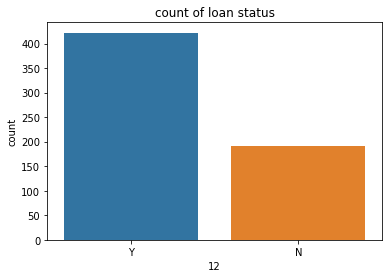

In [16]:
sns.countplot(x=12,data=idf)
plt.title('count of loan status')
plt.show()

# Describing the data

In [17]:
idf.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,614.000000,614.0,614.0,614,614,614,614,614,614,614,614.0,614,614
unique,204.000000,11.0,3.0,614,3,3,5,2,3,505,287.0,3,2
top,146.412162,360.0,1.0,LP001552,Male,Yes,0,Graduate,No,2500,0.0,Semiurban,Y
freq,22.000000,512.0,475.0,1,489,398,345,480,500,9,273.0,233,422


# label encoder:
abel Encoder is needeed to convert 'loan_status' target variable in to numeric values so that it is used to check correlaion of feautures and label

In [18]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
idf[12]=LE.fit_transform(idf[12])
idf[12].value_counts()

1    422
0    192
Name: 12, dtype: int64

# ordinal encoder: 
ordinal encoding is used to convert all the feature object data to numerical.

In [20]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

for i in idf.columns:
    if idf[i].dtypes=="object":
        idf[i]=ord_enc.fit_transform(idf[i].values.reshape(-1,1))


In [21]:
idf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,100.0,9.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,376.0,0.0,2.0,1
1,81.0,9.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,306.0,60.0,0.0,0
2,26.0,9.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,139.0,0.0,2.0,1
3,73.0,9.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,90.0,160.0,2.0,1
4,94.0,9.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,381.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,29.0,9.0,2.0,609.0,0.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,1
610,7.0,5.0,2.0,610.0,1.0,1.0,3.0,0.0,0.0,275.0,0.0,0.0,1
611,163.0,9.0,2.0,611.0,1.0,1.0,1.0,0.0,0.0,431.0,3.0,2.0,1
612,133.0,9.0,2.0,612.0,1.0,1.0,2.0,0.0,0.0,422.0,0.0,2.0,1


# Correlation Using Heatmap:

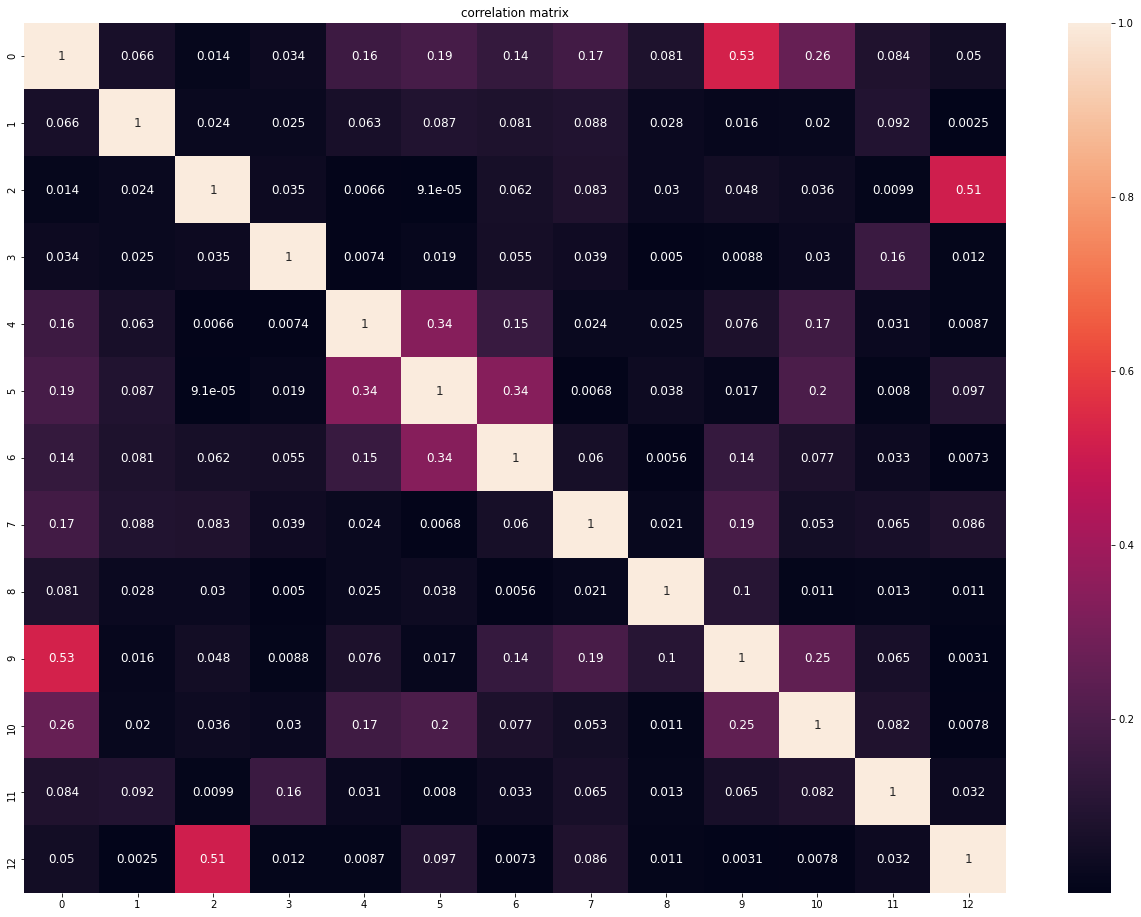

In [22]:
idf_corr=idf.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(idf_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show()    

# Outcome of correlation:
since the target variable is column12 ,Here target variable is highly correlated with column2 .

# Correlation of Loan_status with repect to all the other features:

In [23]:
corr=idf.corr()
corr[12].sort_values(ascending=False)

12    1.000000
2     0.513319
5     0.096657
11    0.032112
3     0.011773
8     0.010880
4     0.008690
10    0.007812
1     0.002512
9    -0.003123
6    -0.007318
0    -0.049717
7    -0.085884
Name: 12, dtype: float64

#  Checking Outliers:

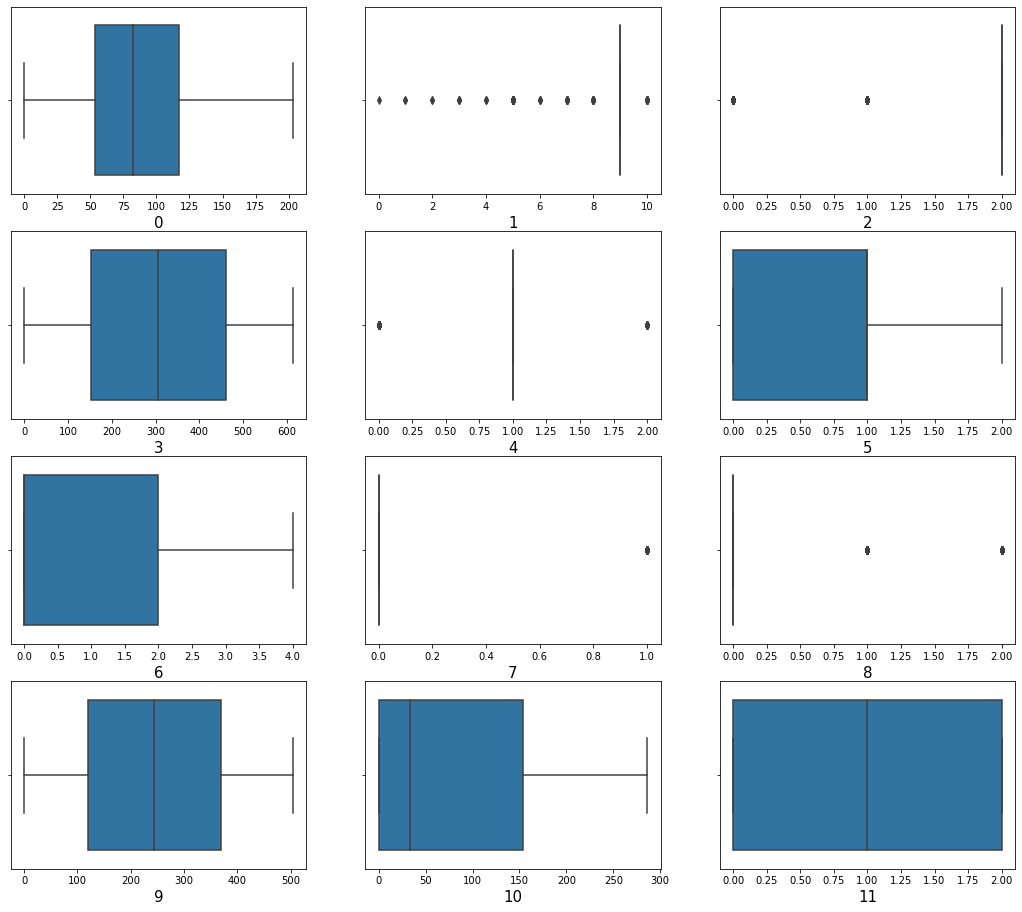

In [25]:
x=idf.drop(columns=[12])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=15:
        ax=plt.subplot(5,3,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()    

# Skewness:

In [26]:
idf.skew()

0     0.458715
1    -2.907201
2    -1.606726
3     0.000000
4    -0.953015
5    -0.538097
6     1.089068
7     1.367622
8     2.191118
9     0.040993
10    0.780870
11   -0.066196
12   -0.809998
dtype: float64

# converting column 12 name to orginal loan status:

In [36]:
idf[12]=idf['loan_status']
idf

,0,1,2,3,4,5,6,7,8,9,10,11,12,loan_status
0,100.0,9.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,376.0,0.0,2.0,1,1
1,81.0,9.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,306.0,60.0,0.0,0,0
2,26.0,9.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,139.0,0.0,2.0,1,1
3,73.0,9.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,90.0,160.0,2.0,1,1
4,94.0,9.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,381.0,0.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,29.0,9.0,2.0,609.0,0.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,1,1
610,7.0,5.0,2.0,610.0,1.0,1.0,3.0,0.0,0.0,275.0,0.0,0.0,1,1
611,163.0,9.0,2.0,611.0,1.0,1.0,1.0,0.0,0.0,431.0,3.0,2.0,1,1
612,133.0,9.0,2.0,612.0,1.0,1.0,2.0,0.0,0.0,422.0,0.0,2.0,1,1


In [41]:
del idf[12]
idf

,0,1,2,3,4,5,6,7,8,9,10,11,loan_status
0,100.0,9.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,376.0,0.0,2.0,1
1,81.0,9.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,306.0,60.0,0.0,0
2,26.0,9.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,139.0,0.0,2.0,1
3,73.0,9.0,2.0,3.0,1.0,1.0,0.0,1.0,0.0,90.0,160.0,2.0,1
4,94.0,9.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,381.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,29.0,9.0,2.0,609.0,0.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,1
610,7.0,5.0,2.0,610.0,1.0,1.0,3.0,0.0,0.0,275.0,0.0,0.0,1
611,163.0,9.0,2.0,611.0,1.0,1.0,1.0,0.0,0.0,431.0,3.0,2.0,1
612,133.0,9.0,2.0,612.0,1.0,1.0,2.0,0.0,0.0,422.0,0.0,2.0,1


# Feature selection method:

In [43]:
from sklearn.feature_selection import SelectKBest,f_classif

x=idf.drop('loan_status',axis=1)
y=idf.loan_status 

best_features=SelectKBest(score_func=f_classif,k=10)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_name','Score']

feature_scores.nlargest(10,'Score')

,Feature_name,Score
2,2,218.953654
5,5,5.771607
7,7,4.547685
0,0,1.516460
11,11,0.631733
3,3,0.084843
8,8,0.072455
4,4,0.046215
10,10,0.037351
6,6,0.032777


# creating a new dataset having best features

In [45]:
df_new=idf[[2,5,7,0,11,3,8,4,10,6,'loan_status']]
df_new

,2,5,7,0,11,3,8,4,10,6,loan_status
0,2.0,0.0,0.0,100.0,2.0,0.0,0.0,1.0,0.0,0.0,1
1,2.0,1.0,0.0,81.0,0.0,1.0,0.0,1.0,60.0,1.0,0
2,2.0,1.0,0.0,26.0,2.0,2.0,1.0,1.0,0.0,0.0,1
3,2.0,1.0,1.0,73.0,2.0,3.0,0.0,1.0,160.0,0.0,1
4,2.0,0.0,0.0,94.0,2.0,4.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,2.0,0.0,0.0,29.0,0.0,609.0,0.0,0.0,0.0,0.0,1
610,2.0,1.0,0.0,7.0,0.0,610.0,0.0,1.0,0.0,3.0,1
611,2.0,1.0,0.0,163.0,2.0,611.0,0.0,1.0,3.0,1.0,1
612,2.0,1.0,0.0,133.0,2.0,612.0,0.0,1.0,0.0,2.0,1


# Removing outlier using Zscore technique:

In [46]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df_new)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df_new[filtering_entry]
df

,2,5,7,0,11,3,8,4,10,6,loan_status
0,2.0,0.0,0.0,100.0,2.0,0.0,0.0,1.0,0.0,0.0,1
1,2.0,1.0,0.0,81.0,0.0,1.0,0.0,1.0,60.0,1.0,0
2,2.0,1.0,0.0,26.0,2.0,2.0,1.0,1.0,0.0,0.0,1
3,2.0,1.0,1.0,73.0,2.0,3.0,0.0,1.0,160.0,0.0,1
4,2.0,0.0,0.0,94.0,2.0,4.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,2.0,0.0,0.0,29.0,0.0,609.0,0.0,0.0,0.0,0.0,1
610,2.0,1.0,0.0,7.0,0.0,610.0,0.0,1.0,0.0,3.0,1
611,2.0,1.0,0.0,163.0,2.0,611.0,0.0,1.0,3.0,1.0,1
612,2.0,1.0,0.0,133.0,2.0,612.0,0.0,1.0,0.0,2.0,1


# Percentage data loss:

In [47]:
loss_percent=(614-582)/614*100
loss_percent

5.211726384364821

# Dividing the features and label columns as 'x' and 'y' and scaling the features:

In [48]:
x=df.drop(columns='loan_status')
y=df.loan_status

# Power transformation for removing skewness:

In [49]:
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson')

In [50]:
features=[2,4,7,8]
df[features]=scaler.fit_transform(df[features].values)

In [51]:
df[features]

,2,4,7,8
0,0.539520,0.299743,-0.530979,-0.404969
1,0.539520,0.299743,-0.530979,-0.404969
2,0.539520,0.299743,-0.530979,2.469324
3,0.539520,0.299743,1.883315,-0.404969
4,0.539520,0.299743,-0.530979,-0.404969
...,...,...,...,...
609,0.539520,-1.823557,-0.530979,-0.404969
610,0.539520,0.299743,-0.530979,-0.404969
611,0.539520,0.299743,-0.530979,-0.404969
612,0.539520,0.299743,-0.530979,-0.404969


In [52]:
x=df.drop(columns='loan_status')
y=df.loan_status

In [53]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)


# Modelling:

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

# Finding the best Random State:

In [56]:
knn=KNeighborsClassifier()
maxacc=0
maxrs=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    pred_test=knn.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print('Best accuracy is: ',maxacc,'Best state is: ',maxrs)

Best accuracy is:  0.811965811965812 Best state is:  296


# Creating train-test split:

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=296)

# KNeighborsClassifier:

In [58]:
from sklearn.metrics import classification_report
knn.fit(x_train,y_train)
pred_test=knn.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.811965811965812
confusion_matrix: 
 [[18 15]
 [ 7 77]]
classification report:                precision    recall  f1-score   support

           0       0.72      0.55      0.62        33
           1       0.84      0.92      0.88        84

    accuracy                           0.81       117
   macro avg       0.78      0.73      0.75       117
weighted avg       0.80      0.81      0.80       117



# DecisionTreeClassifier:

In [59]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train,y_train)
pred_test=clf1.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.6666666666666666
confusion_matrix: 
 [[22 11]
 [28 56]]
classification report:                precision    recall  f1-score   support

           0       0.44      0.67      0.53        33
           1       0.84      0.67      0.74        84

    accuracy                           0.67       117
   macro avg       0.64      0.67      0.64       117
weighted avg       0.72      0.67      0.68       117



# LogisticRegression:

In [60]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8376068376068376
confusion_matrix: 
 [[17 16]
 [ 3 81]]
classification report:                precision    recall  f1-score   support

           0       0.85      0.52      0.64        33
           1       0.84      0.96      0.90        84

    accuracy                           0.84       117
   macro avg       0.84      0.74      0.77       117
weighted avg       0.84      0.84      0.82       117



# RandomForestClassifier:

In [61]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
pred_test=clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8290598290598291
confusion_matrix: 
 [[17 16]
 [ 4 80]]
classification report:                precision    recall  f1-score   support

           0       0.81      0.52      0.63        33
           1       0.83      0.95      0.89        84

    accuracy                           0.83       117
   macro avg       0.82      0.73      0.76       117
weighted avg       0.83      0.83      0.82       117



Knn Model, Decision Tree Classifier,Logistic regression

and Random Forest Classifier are producing good accuracy.

Now we will check cross validation score as well as overfiting if exists

# CrossValidation Score:

In [62]:
pred_test=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_test)
for i in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print('at cv:-',i)
    print('cv score-',lsc*100)
    print('acc_score-',lss*100)

at cv:- 2
cv score- 77.31958762886599
acc_score- 83.76068376068376
at cv:- 3
cv score- 76.46048109965635
acc_score- 83.76068376068376
at cv:- 4
cv score- 75.5999055266887
acc_score- 83.76068376068376
at cv:- 5
cv score- 76.63572060123784
acc_score- 83.76068376068376
at cv:- 6
cv score- 76.63230240549828
acc_score- 83.76068376068376
at cv:- 7
cv score- 76.6269158265716
acc_score- 83.76068376068376
at cv:- 8
cv score- 76.63622526636225
acc_score- 83.76068376068376
at cv:- 9
cv score- 76.8162393162393
acc_score- 83.76068376068376


# CrossValidation Score for each model:

In [63]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(knn,x_scaled,y,cv=2)
print('cross validation score of knn model is:',csv.mean())

cross validation score of knn model is: 0.7353951890034365


In [64]:
csv=cross_val_score(clf1,x_scaled,y,cv=2)
print('cross validation score of decision tree model is:',csv.mean())

cross validation score of decision tree model is: 0.5876288659793814


In [65]:
csv=cross_val_score(lr,x_scaled,y,cv=2)
print('cross validation score of logistic regression model is:',csv.mean())

cross validation score of logistic regression model is: 0.7714776632302406


In [66]:
csv=cross_val_score(clf,x_scaled,y,cv=2)
print('cross validation score of Random forest classifier model is:',csv.mean())

cross validation score of Random forest classifier model is: 0.768041237113402


In [ ]:
logistic regression is performing better among all so we will continue with logistic regression model

# HyperParameterTuning:

In [67]:
from sklearn.model_selection import GridSearchCV
params={   'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'C' : np.logspace(-4, 4, 20),
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
             'max_iter' : [100, 1000,2500, 5000]
           }
gri=GridSearchCV(lr,param_grid=params,cv=2,verbose=True, n_jobs=-1)
gri.fit(x_train,y_train)


Fitting 2 folds for each of 1600 candidates, totalling 3200 fits


GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [68]:
print(gri.best_params_)
gri_pred=gri.best_estimator_.predict(x_test)

{'C': 0.08858667904100823, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [69]:
accuracy_score(y_test,gri_pred)

0.8290598290598291

# ROC AUC Plot:

<function matplotlib.pyplot.show(close=None, block=None)>

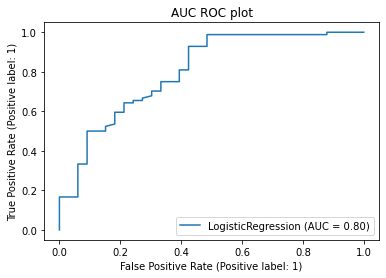

In [73]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gri.best_estimator_,x_test,y_test)
plt.title('AUC ROC plot')
plt.show

Final accuracy is 82% and AUC score is 80% which is decently good.

# Saving the model:

In [70]:
import pickle
filename='loan_status.pkl'
pickle.dump(gri.best_estimator_,open(filename,'wb'))


# Conclusion:

In [71]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gri.best_estimator_.predict(x_test))
df_conclusion=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_conclusion

,Original,Predicted
0,0,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
112,1,1
113,1,1
114,1,1
115,1,1
